In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
boston = datasets.load_boston()

In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Analysis
#### Median and average home values across all Boston Suburbs in dollars.

In [3]:
np.median(boston.target) * 1000

21200.0

In [4]:
np.mean(boston.target) * 1000

22532.806324110676

#### Median home value of suburb with newest houses

In [5]:
newest = boston.data.argmin(axis=0)[6]

In [6]:
boston.target[newest] * 1000

26600.0

#### Relationship between per-capita crime rate and pupil-teacher ratio.
Differentiate between whether or not the suburb is bounded by the Charles River.

In [7]:
data_by_attr = np.transpose(boston.data)

In [8]:
river_prop = data_by_attr[3]

In [9]:
crime = data_by_attr[0]

In [10]:
river_crime = crime[river_prop == 1]

In [11]:
no_river_crime = crime[river_prop == 0]

In [12]:
pt_ratio = data_by_attr[10]

In [13]:
river_pt_ratio = pt_ratio[river_prop == 1]

In [14]:
no_river_pt_ratio = pt_ratio[river_prop == 0]

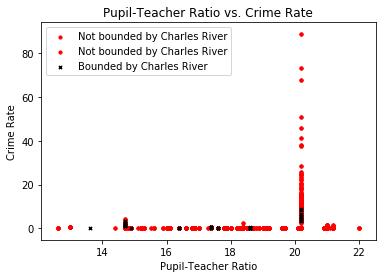

In [30]:
plt.title('Pupil-Teacher Ratio vs. Crime Rate')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Crime Rate')

plt.scatter(no_river_pt_ratio, no_river_crime, s=10, c='red', label='Not bounded by Charles River')
plt.scatter(river_pt_ratio, river_crime, s=10, c='black', marker='x', label='Bounded by Charles River')

plt.legend()

plt.show()

Comparision between per-capita crime rate and pupil-teacher ratio in a town. Areas that are bounded by the Charles River are marked with a black x. In general, the areas bounded by the river are comparable to those not bounded, and the crime rate is low regardless of the pupil-teacher ratio. However, there is a spike in crime rate at a ratio of 20.2 that reaches 8.98% for river properties and 88.98% for non-river properties. This spike may be due to the lage number of data points for the 20.2 pupil-teacher ratio in the non-river properties, the mean crime rate for this ratio is significantly higher than the other ratios at 12.34%.

In [16]:
no_river_crime[no_river_pt_ratio == 20.2].mean()

12.336070833333334

#### Relationship between proportion of black citizens and distance to employment centers in Boston.

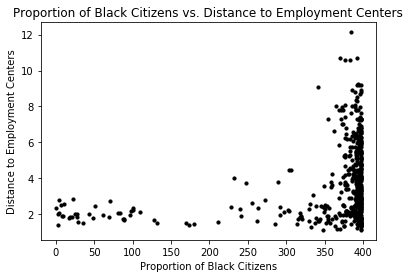

In [24]:
b_cits = data_by_attr[11]
employ = data_by_attr[7]

plt.title('Proportion of Black Citizens vs. Distance to Employment Centers')
plt.xlabel('Proportion of Black Citizens')
plt.ylabel('Distance to Employment Centers')

plt.scatter(b_cits, employ, s=10, c='black')

plt.show()

Comparision between the proportion of black citizens and distance to employment centers. Areas that are closest to employment centers either have very low proportions of black citizens or very high proportions. The areas with the highest proportions can be any distance from employment centers, but only the areas furthest from the employment centers have the highest proportion of black citizens.

#### Relationship between median value of owner-occuped homes and NOX concentration along with median home value and the proportion of non-retail business (on the same plot).

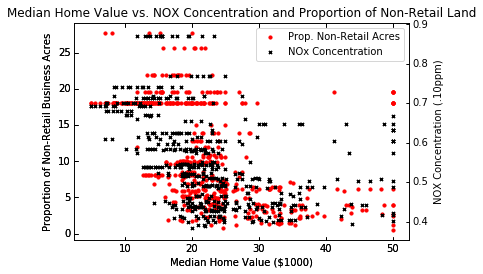

In [39]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

nox = data_by_attr[4]
business = data_by_attr[2]


bus_axis = host_subplot(111, axes_class=AA.Axes)
nox_axis = bus_axis.twinx()

plt.title('Median Home Value vs. NOX Concentration and Proportion of Non-Retail Land')
bus_axis.set_xlabel('Median Home Value ($1000)')
bus_axis.set_ylabel('Proportion of Non-Retail Business Acres')
nox_axis.set_ylabel('NOX Concentration (.10ppm)')

bus_axis.scatter(boston.target, business, s=10, c='red', label='Prop. Non-Retail Acres')
nox_axis.scatter(boston.target, nox, s=10, c='black', marker='x', label='NOx Concentration')

plt.legend()

plt.draw()
plt.show()

Comparison between median home value, concentration of nitric oxides, and the proportion of non-retail business acres. Areas with higher value homes generally have lower concentrations of NOX and non-retail areas. Conversely, areas with lower value have much higher NOX concentrations and non-retail areas. Overall, the concentration of NOX corresponds directly to the proportion of non-retail business acres, regardess of the median home value of the area.

#### Relationship between the proportion of units built prior to 1940 and the concentration of NOX.

Since the concentration of nitric oxides seems to be directly related to the proportion of non-retail acres, what is its relationship with the proportion of older units. Are polutants more directly related to older units or non-retail business acres?

In [31]:
ages = data_by_attr[6]

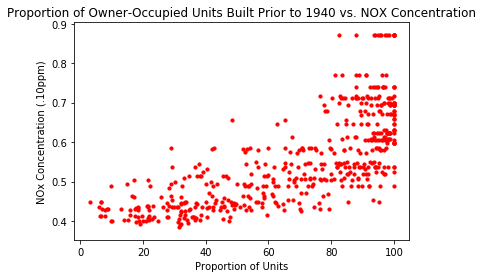

In [37]:
plt.title('Proportion of Owner-Occupied Units Built Prior to 1940 vs. NOX Concentration')
plt.xlabel('Proportion of Units')
plt.ylabel('NOx Concentration (.10ppm)')

plt.scatter(ages, nox, s=10, c='red')

plt.show()

Comparison between proportion of owner-occupied units built prior to 1940 and concentration of NOX. Although the differences in NOX concentration are small, there are distinctly higher concentrations of NOX in areas that mostly consist of older units. Areas that primarily consist of newer units greatly reduced concentrations of NOX, and the concentration increases as the proportion of older units increases. The concetration of NOX appears to be directly proportional to the proportion of older units.

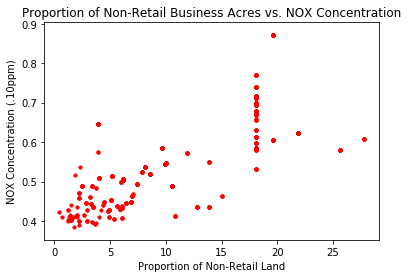

In [36]:
plt.title('Proportion of Non-Retail Business Acres vs. NOX Concentration')
plt.xlabel('Proportion of Non-Retail Land')
plt.ylabel('NOX Concentration (.10ppm)')

plt.scatter(business, nox, s=10, c='red')

plt.show()

Comparison between proportion of non-retail business acres and concentration of NOX. The concentration of NOX does increase as the proportion of non-retail land increases. However, the increase does not correlate directly with the non-retail land, since there is a large spike in NOX concentration at 18.1%. It should be noted that this may be an artifact of the dataset, as there are very few points for higher proportions of non-retail land.